#### Análisis gráficos exploratorios de datos 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris

In [2]:
data = load_iris(as_frame=bool)

In [3]:
data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
versicolor = data.frame[(data.frame['target']==1)]

In [5]:
versicolor = versicolor['petal length (cm)']

In [6]:
versicolor

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal length (cm), dtype: float64

In [7]:
versicolor_petal_length = np.array(versicolor)

In [8]:
versicolor_petal_length

array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

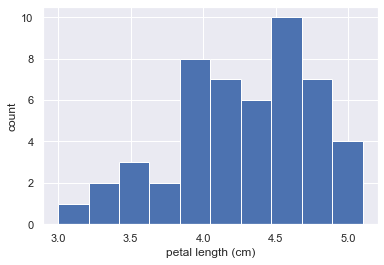

In [9]:
sns.set()
plt.hist(versicolor_petal_length)
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.show()

La regla de la raiz cuadrada nos permite elegir el numero de contenedores para el histograma, por defecto trae diez, vamos a calcularla

In [10]:
#primero se calcula el tamaña del array
n_data = len(versicolor_petal_length)
n_data

50

In [11]:
#calculamos la raiz cuadrada del tamaño del array
n_bins = int(np.sqrt(n_data))
n_bins

7

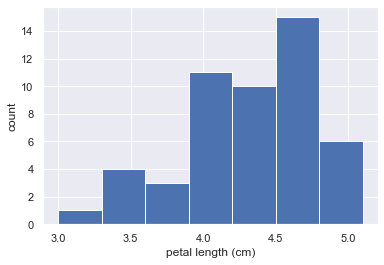

In [12]:
plt.hist(versicolor_petal_length, bins=n_bins)
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.show()

Vamor a crear una grafica de Bee swarm

In [13]:
df = data.frame

In [14]:
df.rename(columns={'target':'species'}, inplace=True)

In [15]:
df['species'] = df['species'].map({0:'setosa', 1:'versicolor',2:'virginica'})

In [16]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


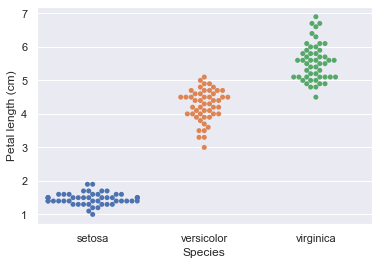

In [17]:
sns.swarmplot(x='species', y='petal length (cm)', data=df)
plt.xlabel('Species')
plt.ylabel('Petal length (cm)')
plt.show()

que podemos entender de esta grafica? que Los pétalos de virginica tienden a ser los más largos y los pétalos de setosa tienden a ser los más cortos de las tres especies.

In [18]:
def ecdf(df):
    n = len(df)
    x = np.sort(df)
    y = np.arange(1, len(x)+1) / n
    return x, y

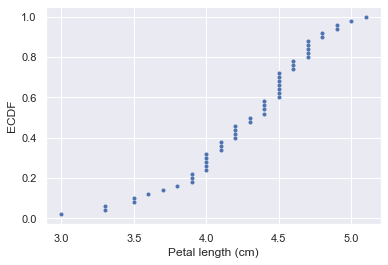

In [19]:
x_vers, y_vers = ecdf(versicolor_petal_length)

plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.xlabel('Petal length (cm)')
plt.ylabel('ECDF')
plt.show()

In [20]:
setosa_petal_length = df[(df['species']=='setosa')]
setosa_petal_length = setosa_petal_length['petal length (cm)']

In [21]:
virginica_petal_length = df[(df['species']=='virginica')]
virginica_petal_length = virginica_petal_length['petal length (cm)']

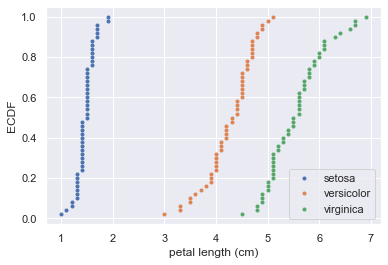

In [22]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)


# Plot all ECDFs on the same plot
_=plt.plot(x_set, y_set,marker='.', linestyle='none')
_=plt.plot(x_vers, y_vers,marker='.', linestyle='none')
_=plt.plot(x_virg, y_virg,marker='.', linestyle='none')


# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [23]:
mean_length_vers = np.mean(versicolor_petal_length)

print('I. Versicolor:', mean_length_vers)

I. Versicolor: 4.26


In [25]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


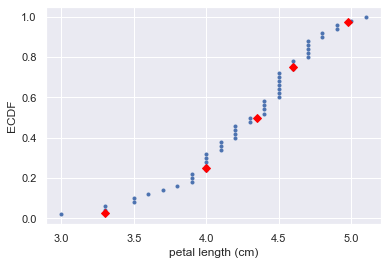

In [30]:
# Plot the ECDF
plt.plot(x_vers, y_vers, '.')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

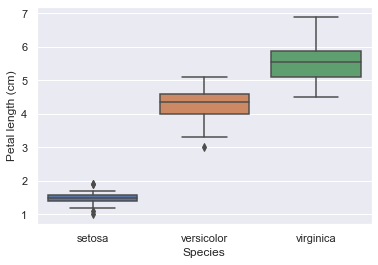

In [31]:
# Create box plot with Seaborn's default settings
sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
plt.xlabel('Species')
plt.ylabel('Petal length (cm)')


# Show the plot
plt.show()


In [32]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


In [33]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


para comparar dos propiedades de una misma especie podemos hacer utilidad de un diagrama de dispersion el cual nos permite visualizar que tan corelacionada estan las dos variables. Si la flor se escala (es decir, conserva su proporción a medida que crece), esperaríamos que el largo y el ancho estén correlacionados.

In [40]:
versicolor_petal_width = df[(df['species']=='versicolor')]
versicolor_petal_width = versicolor_petal_width['petal width (cm)']

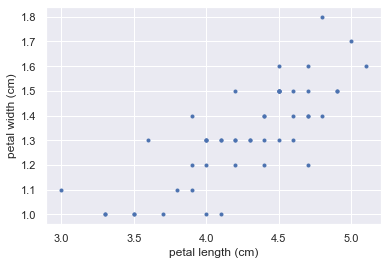

In [43]:
# Make a scatter plot
plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')


# Label the axes
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')


# Show the result
plt.show()

los petalos mas largos tienden a ser mas anchos

In [47]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length,versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [45]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

In [46]:
r = pearson_r(versicolor_petal_length,versicolor_petal_width)
print(r)

0.7866680885228169
